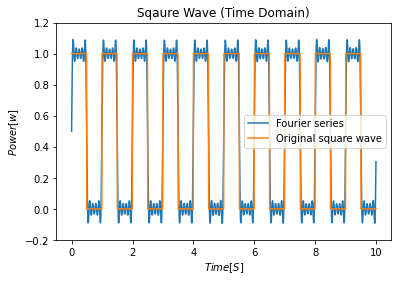

In [201]:
import numpy as np
from scipy.signal import square
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy import fft
%matplotlib inline
L=10 # Periodicity of the periodic function f(x)
freq=10 # No of waves in time period L
dutycycle=0.5
samples=1000
terms=100
# Generation of square wave
x=np.linspace(0,L,samples,endpoint=False)
y=square(2.0*np.pi*x*freq/L,duty=dutycycle)
y=(y/2)+0.5
# Calculation of Fourier coefficients
a0=2./L*simps(y,x)
an=lambda n:2.0/L*simps(y*np.cos(2.*np.pi*n*x/L),x)
bn=lambda n:2.0/L*simps(y*np.sin(2.*np.pi*n*x/L),x)
# sum of the series
s=a0/2.+sum([an(k)*np.cos(2.*np.pi*k*x/L)+bn(k)*np.sin(2.*np.pi*k*x/L) for k in range(1,terms+1)])
#s=(s/2)+0.5
# Plotting
plt.plot(x,s,label="Fourier series")
plt.plot(x,y,label="Original square wave")
plt.xlabel("$Time[S]$")
plt.ylabel("$Power[w]$")
plt.ylim(-0.2,1.2)
plt.legend(loc='best',prop={'size':10})
plt.title("Sqaure Wave (Time Domain)")
plt.savefig("fs_square.png")
plt.show()

(-0.2, 1.2)

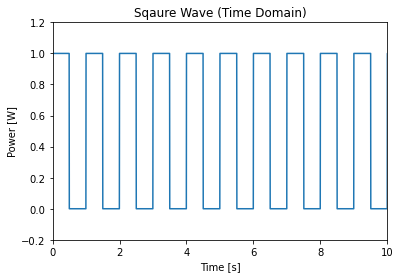

In [202]:
sq_wave = plt.figure()
plt.plot(time, amplitude)
plt.axis((0, 10, 0, 1))
plt.xlabel('Time [s]')
plt.ylabel('Power [W]');
plt.title("Sqaure Wave (Time Domain)")
plt.ylim(-0.2,1.2)

In [203]:
from scipy.fft import fft
y = fft(amplitude)

In [204]:
N = len(y)
mag = np.abs(y)
phase = np.angle(y)

In [205]:
fmax = 1/(time[1]-time[0])
fstep = fmax/(len(time) - 1)
fmax, fstep

(200.0, 0.020002000200020003)

In [206]:
freq = np.arange(0, fmax + fstep, fstep)

In [207]:
fft_mag = plt.figure()
#plt.plot(freq, mag/(len(time)/2));

<Figure size 432x288 with 0 Axes>

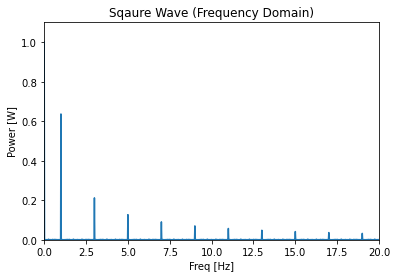

In [208]:
plt.plot(freq, mag/(len(time)/2));
plt.axis((0, 20, 0, 1.1))
plt.xlabel('Freq [Hz]')
plt.ylabel('Power [W]')
plt.title("Sqaure Wave (Frequency Domain)")
plt.savefig("fft.png")